In [2]:
import plotly.graph_objects as go
import geopandas as gpd
import plotly.express as px
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

In [3]:
import pandas as pd
from pathlib import Path

data_dir=Path('/Users/suzinyou/workspace/ineq') / 'data' / '10. 데이터산출물'
dfs = pd.read_excel('/Users/suzinyou/Dropbox/가천대 서울연구원 프로젝트/10. 데이터산출물/03_quantiles/income_shares.xlsx', sheet_name=None)

In [19]:
df = dfs['kr_adult20_earner']

In [20]:
df.head()

,var,std_yyyy,income_group,share
0,inc_bus,2003,Bottom 20%,0.009687
1,inc_bus,2003,Next 30%,0.049785
2,inc_bus,2003,Bottom 50%,0.073589
3,inc_bus,2003,Middle 40%,0.330217
4,inc_bus,2003,Top 10%,0.596193


In [21]:
var = 'inc_wage'

In [99]:
colors = px.colors.qualitative.Plotly
pastels = px.colors.qualitative.Pastel1
color_discrete_map = {
    'Bottom 50%': colors[0], 
    'Middle 40%': colors[2], 
    'Top 10%': colors[1],
    'Bottom 20%': pastels[1],
    'Top 1%': pastels[0]
}

fig = px.bar(
    df[(df['var'] == var) & (df['income_group'].apply(lambda x: x in ['Bottom 50%', 'Middle 40%', 'Top 10%']))], 
    x="std_yyyy", y="share", color="income_group", title="inc_tot", color_discrete_map=color_discrete_map, 
    width=50*12, height=50*8
            )

bottom20 = df[(df['var'] == var) & (df['income_group']=='Bottom 20%')]
fig.add_trace(go.Scatter(x=bottom20.std_yyyy, y=bottom20.share,
                        mode='lines+markers',
                        name='Bottom 20%',
                        line=dict(color=pastels[1]),
                        marker=dict(color=pastels[1])))

top1 = df[(df['var'] == var) & (df['income_group']=='Top 1%')].copy()
top1['share'] = 1-top1['share']
fig.add_trace(go.Scatter(x=top1.std_yyyy, y=top1.share,
                        mode='lines+markers',
                        name='Top 1%',
                        line=dict(color=pastels[0]),
                        marker=dict(color=pastels[0])))
fig.show()

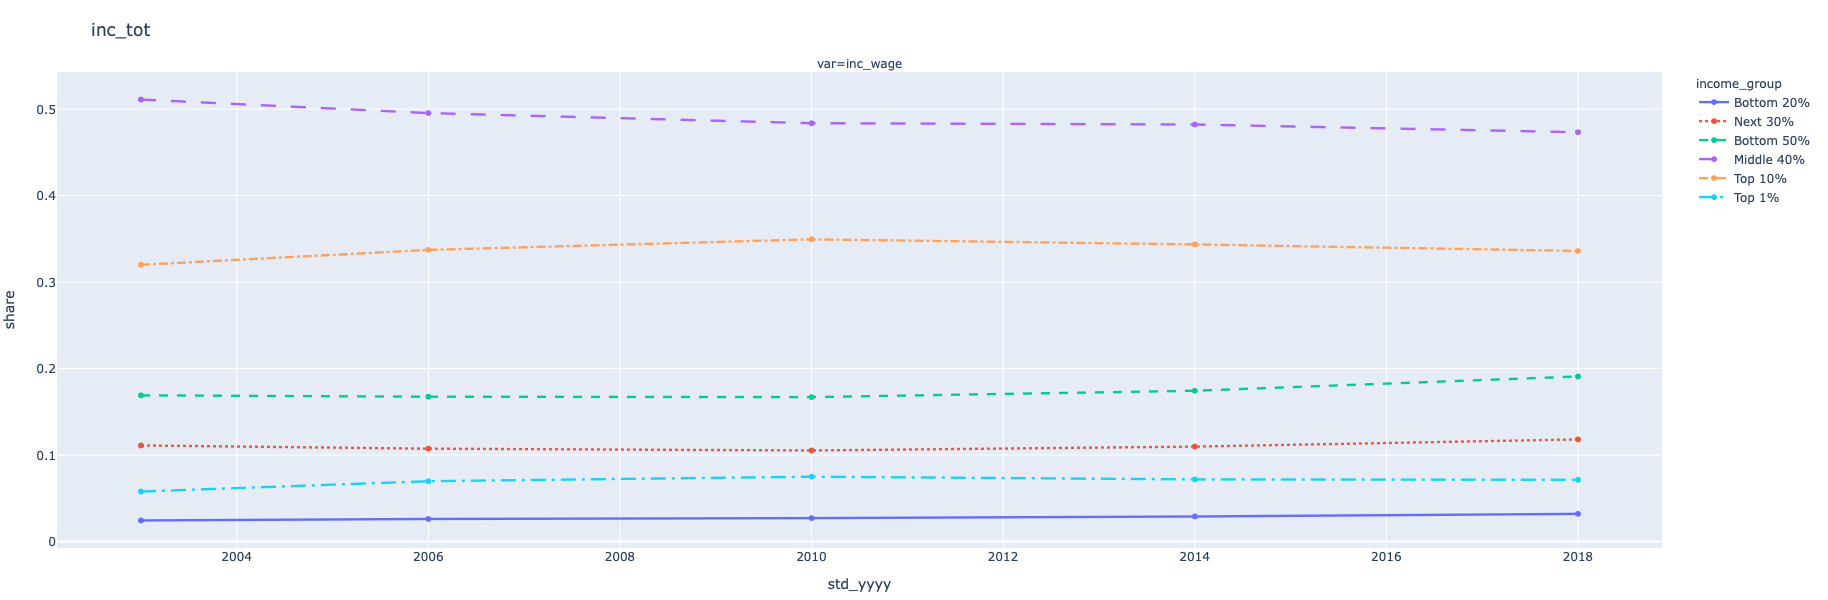

In [75]:
df_filtered = df[df['var'] == var]
fig = px.line(df_filtered, x="std_yyyy", y="share", color='income_group', line_dash='income_group', 
              title=f"inc_tot", facet_col='var', 
              width=50*12, height=50*12)
fig.update_traces(line=dict(width=2.4), mode='lines+markers')
fig.update_layout(margin={"r":16,"t":72,"l":16,"b":16})
fig.show()

In [4]:
mmi = pd.read_excel('/Users/suzinyou/Dropbox/가천대 서울연구원 프로젝트/10. 데이터산출물/mean_median_and_indices.xlsx', sheet_name=None)

In [3]:
mmi.keys()

dict_keys(['kr_adult20', 'kr_adult20_earner', 'kr_capita', 'kr_earner', 'kr_adult15', 'kr_sido_adult20', 'kr_hh', 'seoul_hh', 'kr_eq', 'seoul_eq', 'seoul_sigungu_hh', 'seoul_adult20', 'seoul_adult15', 'seoul_adult20_earner', 'seoul_capita', 'seoul_earner', 'seoul_sigungu_adult20', 'seoul_sigungu_adult20_earner'])

In [43]:
def plot_shares_line(df, key, var):
    """ income_shares.xlsx """
    df_filtered = df[df['var'] == var]
    fig = px.line(df_filtered, x="std_yyyy", y="share", color='income_group', line_dash='income_group',
                  title=f"{translate(key)} {translate(var)} 점유율",
                  facet_col='var',
                  width=128 * 12, height=128 * 12)
    fig.update_traces(line=dict(width=2.4), mode='lines+markers')
    fig.update_layout(margin={"r": 16, "t": 72, "l": 16, "b": 16})
    path_obj = project_dir / 'reports' / 'figures' / f"share_line_{key}-{var}.png"
    fig.write_image(str(path_obj))
    return fig

In [5]:
dic = {}

region2ko = {
    'seoul': '서울',
    'seoulpanel': '서울패널',
    'kr': '전국',
    'krpanel': '전국패널',
    'sigungu': '구별',
    'sido': '시도별'
}

stat2ko = {
    'mean': '평균',
    'median': '중위',
    'max': '최대',
    'min': '최소',
    'std': '표준편차',
    'count': '(소득자만)',
    'num_indi': '인구',
    'frac_earners': '소득자 비율',
    'gini': '지니계수',
    'iqsr': '5분위배율',
    'rpr': '상대빈곤율'
}

var2ko = {
    'inc_tot': '총소득',
    'inc_wage': '근로소득',
    'inc_bus': '사업소득',
    'inc_int': '이자소득',
    'inc_divid': '배당소득',
    'inc_pnsn_natl': '국민연금소득',
    'inc_pnsn_occup': '직역연금소득',
    'inc_fin': '금융소득',
    'inc_pnsn': '공적연금소득',
    'inc_main': '본원소득(총-연금)',
    'prop_txbs_tot': '총재산과세표준',
    'prop_txbs_hs': '주택과세표준',
    'prop_txbs_lnd': '토지과세표준',
    'prop_txbs_bldg': '건물과세표준',
    # 'prop_txbs_shp': '선박항공기과세표준',
}
unit2ko = {
    'indi': '개인',
    'hh': '가구',
    'eq': '균등화',
    'adult20': '성인(20세 이상)',
    'adult15': '15세 이상',
    'capita': 'per capita',
    'earner': '소득자'
}

col2ko = {
    'var': '변수',
    'std_yyyy': '연도',
    'region': '지역'
}

dic.update(region2ko)
dic.update(stat2ko)
dic.update(var2ko)
dic.update(unit2ko)
dic.update(col2ko)
dic.update(real='실질')

def translate(x):
    if x in dic:
        return dic[x]

    split = x.split('_')
    if len(split) == 0:
        raise ValueError(f"Got empty input {x}")
    elif len(split) == 1:
        raise ValueError(f"Can't translate {x}!")
    else:
        for i in range(1, len(split) + 1):
            cur_key = '_'.join(split[:i])
            if cur_key in dic:
                return dic[cur_key] + ' ' + translate('_'.join(split[i:]))
        raise KeyError(f"Can't translate {x}!")

In [6]:
colors = px.colors.qualitative.Plotly
tab10 = px.colors.qualitative.T10
var_color_map = {
    'inc_tot': colors[0],
    'inc_wage': colors[2],
    'inc_bus': colors[3],
    'inc_fin': colors[4],
    'inc_pnsn': colors[5],
    'inc_main': colors[6],
    'prop_txbs_tot': colors[1],
    'prop_txbs_hs': tab10[0],
    'prop_txbs_lnd': tab10[1],
    'prop_txbs_bldg': tab10[2],
    # 'prop_txbs_shp': '선박항공기과세표준',
}
var_color_map_tnsl = {}
for k, v in var_color_map.items():
    var_color_map_tnsl[translate(k)] = v

In [107]:
def plot_lines(_df, stat, color_col, key, var=None, var_prefix_filter=None, facet_col=None):
    df = _df.copy()
    if var_prefix_filter is not None:
        df = df[df['var'].apply(lambda x: x.startswith(var_prefix_filter))]
    elif var is not None:
        df = df[df['var'] == var]
    df['var'] = df['var'].apply(translate)

    if facet_col is not None:
        if facet_col not in _df.columns:
            raise ValueError(f"Facet column {facet_col} doesn't exist")
        facet_col = translate(facet_col)

    df = df.rename(columns={k: translate(k) for k in _df.columns})

    if 'sigungu' in key or 'sido' in key:
        color_col = translate(key.split('_')[1])
    else:
        color_col = translate(color_col)
    if color_col == 'var':
        color_map = var_color_map_tnsl
    else:
        color_map = {v: c for v, c in zip(df[color_col].unique(), px.colors.qualitative.Plotly)}

    if len(df[color_col].unique()) >= 5:
        height = 60 * 12
    else:
        height = 60 * 8

    width = 60 * 12
    if facet_col is not None:
        width += 60 * 8 * (len(df[facet_col].unique()) - 1)

    title = f"{translate(key)} {translate(stat)}"
    new_stat = translate(stat)
    if var is not None:
        title += ' ' + translate(var)
        new_stat += f' {translate(var)}'
        if var.startswith('inc') or var.startswith('prop'):
            new_stat += '(천원)'

    df[new_stat] = df[translate(stat)] / 1000
    std_yyyy = translate("std_yyyy")

    fig = px.line(df, x=std_yyyy, y=new_stat, color=color_col, line_dash=color_col,
                  width=width, height=height,
                  title=title,
                  color_discrete_map=color_map,
                  facet_col=facet_col, facet_col_spacing=0.06)
    fig.update_traces(line=dict(width=2.4), mode='lines+markers')
    fig.update_layout(margin={"r": 16, "t": 72, "l": 16, "b": 16}, )
    fig.update_xaxes(**dict(tickmode='linear', tick0=2006, dtick=4))
    fig.update_yaxes(tickformat=",g", matches=None)
    # first = df.loc[df[translate("std_yyyy")] == 2006, new_stat]

    cols = [std_yyyy, new_stat ,color_col]
    if facet_col is not None:
        cols.append(facet_col)
    df_text = df.loc[
        df[std_yyyy].apply(lambda x: x in list(range(2006, 2019, 4))), cols].copy()
    df_text.loc[:, 'label'] = df[new_stat].apply(lambda x: f"{x:,.0f}")
    data = px.scatter(
        df_text, x=std_yyyy, y=new_stat, text='label', facet_col=facet_col
    ).update_traces(mode="text", textposition='top center')['data']

    def update(y):
        y.update(matches=None)
        y.showticklabels = True

    fig.for_each_yaxis(update)
    
    for trace in data:
        fig.add_trace(trace)

    return fig

In [67]:
df1 = mmi['kr_adult20_earner']
df1['region'] = '전국'
df2 = mmi['seoul_adult20_earner']
df2['region'] = '서울'
df = pd.concat([df1, df2]).reset_index(drop=True)

In [108]:
fig = plot_lines(df, stat='mean_real', key=k, var_prefix_filter='inc', color_col='var', facet_col='var')
fig.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [92]:
f'{14520.152:,.0f}'

'14,520'

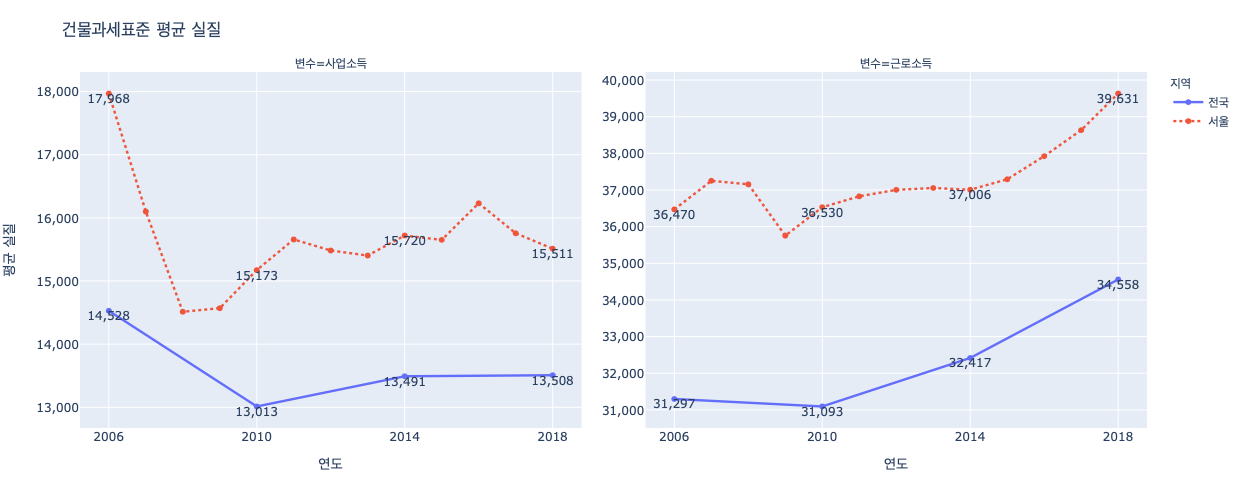

In [97]:
fig = plot_lines(df, stat='mean_real', key=k, var_prefix_filter='inc', color_col='region', facet_col='var')
# fig = plot_lines(df, stat='mean_real', key='adult20_earner', var_prefix_filter='prop', color_col='var', facet_col='region')
fig.show()

In [85]:
fig.write_image('test.png', scale=2)

In [190]:
mmi['kr_sido_adult20']

,var,std_yyyy,sido,시도,count,num_indi,frac_earners,mean,mean_real,median,median_real
0,inc_tot,2003,NaN,NaN,2598,3490,0.744413,1.422423e+06,1.930148e+06,0.0,0.000000e+00
1,inc_tot,2003,11.0,서울특별시,83180,110169,0.755022,9.912230e+06,1.345034e+07,0.0,0.000000e+00
2,inc_tot,2003,26.0,부산광역시,28138,36984,0.760815,6.605147e+06,8.962815e+06,0.0,0.000000e+00
3,inc_tot,2003,27.0,대구광역시,17838,24238,0.735952,6.226810e+06,8.449433e+06,0.0,0.000000e+00
4,inc_tot,2003,28.0,인천광역시,18321,25411,0.720987,6.779958e+06,9.200024e+06,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
82,inc_tot,2018,45.0,전라북도,15285,18749,0.815243,1.573433e+07,1.506398e+07,2618850.0,2.507276e+06
83,inc_tot,2018,46.0,전라남도,16016,19339,0.828171,1.481512e+07,1.418393e+07,1799565.0,1.722896e+06
84,inc_tot,2018,47.0,경상북도,22722,27181,0.835952,1.571870e+07,1.504902e+07,2800000.0,2.680708e+06
85,inc_tot,2018,48.0,경상남도,27987,34430,0.812867,1.703918e+07,1.631324e+07,4151400.0,3.974533e+06


In [195]:
plot_lines(mmi['kr_sido_adult20'].dropna(), 'mean', 'kr_sido_adult20')

TypeError: list indices must be integers or slices, not numpy.float64

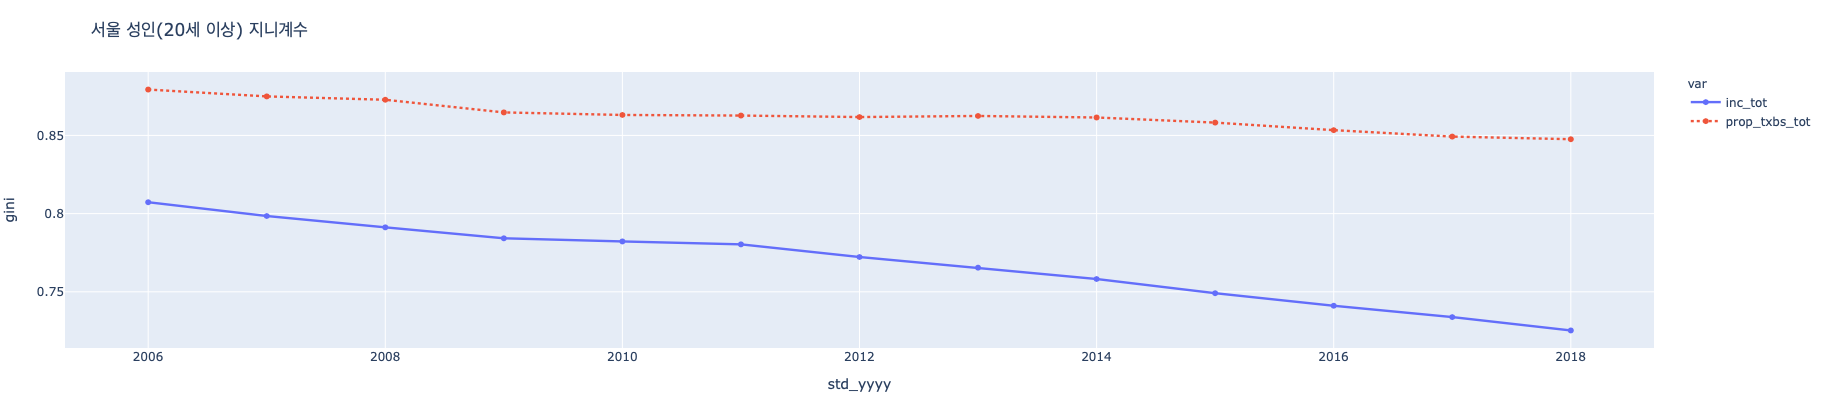

In [175]:
plot_lines(mmi['seoul_adult20'], 'gini', 'seoul_adult20')

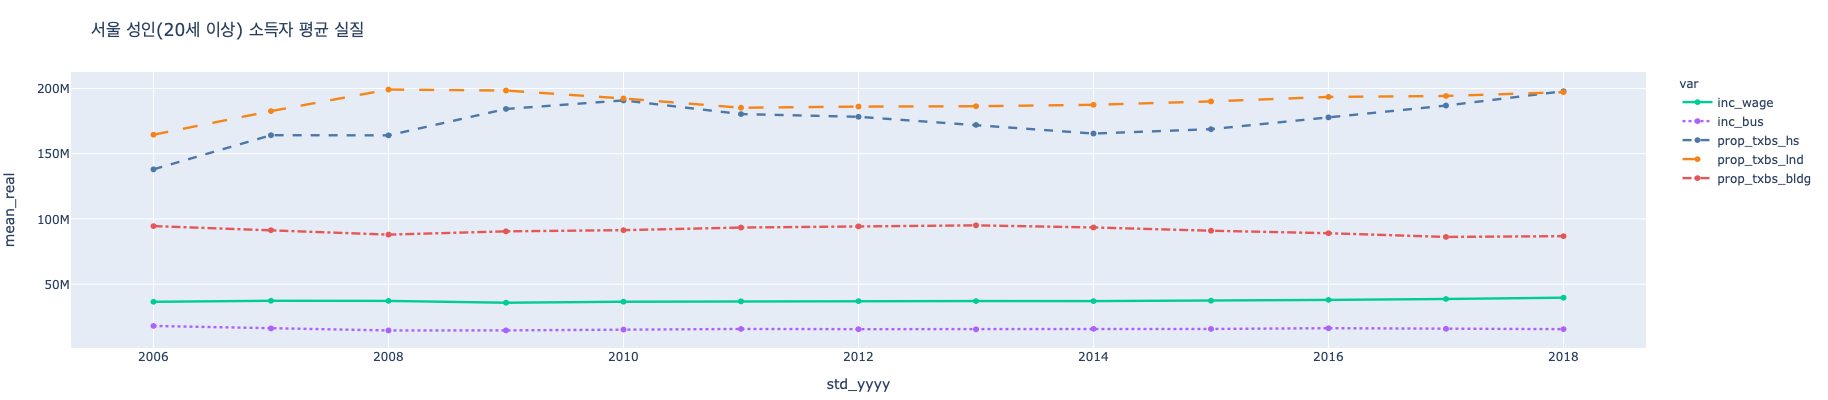

In [184]:
plot_lines(mmi['seoul_adult20_earner'], 'mean_real', 'seoul_adult20_earner')

In [10]:
df = mmi['kr_adult20_earner']

In [125]:
df.head()

,var,std_yyyy,count,num_indi,frac_earners,mean,mean_real,median,median_real,gini,iqsr,rpr
0,inc_wage,2006,114798,497009,0.230978,2.510085e+07,3.129703e+07,18000000,2.244333e+07,0.471797,17.247358,0.256912
1,inc_wage,2010,138577,510415,0.271499,2.831086e+07,3.109341e+07,19571670,2.149528e+07,0.478636,17.007200,0.238885
2,inc_wage,2014,162366,521960,0.311070,3.218922e+07,3.241679e+07,22769634,2.293061e+07,0.468681,16.080858,0.230436
3,inc_wage,2018,185600,529639,0.350427,3.609552e+07,3.455770e+07,26353755,2.523098e+07,0.448921,13.870935,0.212672
4,inc_bus,2006,49398,497009,0.099391,1.165138e+07,1.452755e+07,4110000,5.124560e+06,0.711305,70.587051,0.320843


In [8]:
def plot_population(_df, var, key):
    # Save line plot
    df = _df[_df['var'] == var].copy()
    if df.shape[0] == 0:
        raise ValueError(f"Can't find variable {var} in given df")
    cols = df.columns
    if 'num_indi' in cols:
        y1 = 'num_indi'
    elif 'num_hh' in cols:
        y1 = 'num_hh'
    else:
        return None
    
    fig = px.bar(df, x="std_yyyy", y=y1, 
                 title=f"{translate(key)}", opacity=0.7,
                 width=128 * 12, height=128 * 8, )
    
    if 'adult' in key:
        fig.add_trace(go.Bar(x=df.std_yyyy, y=df['count'], opacity=0.7, name='소득자수', base=0))

    fig.update_layout(margin={"r": 16, "t": 72, "l": 16, "b": 16})
    fig.show()
#     fig.write_image(project_dir / "reports" / "figures" / f"count_{y}_{key}.png")

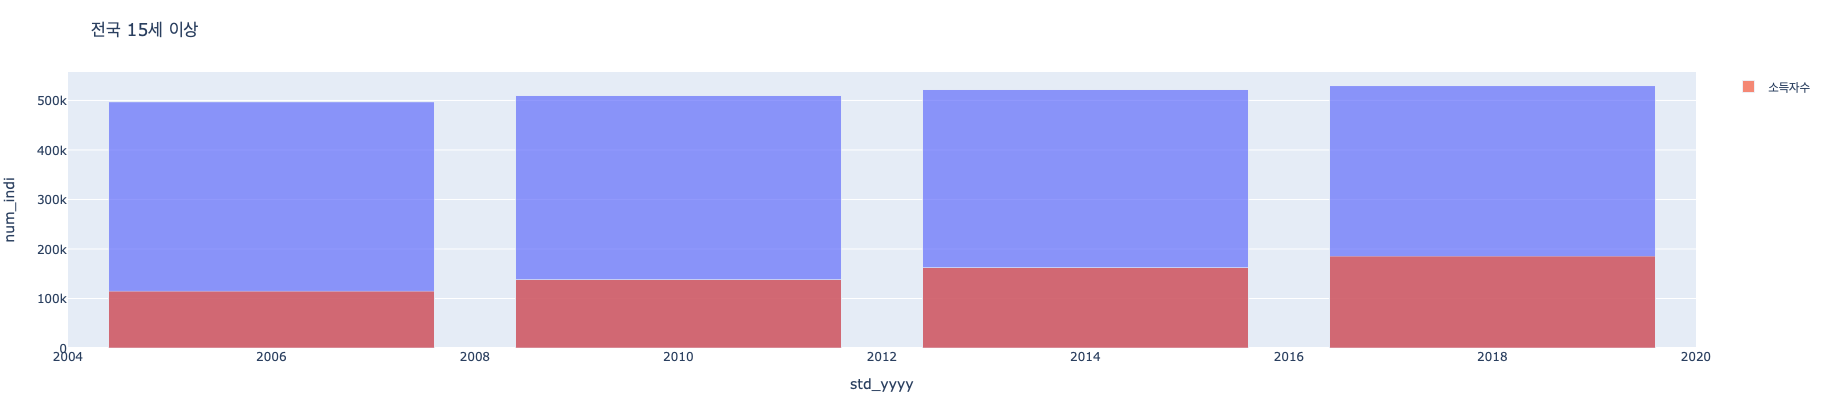

In [12]:
plot_population(df, 'inc_wage', 'kr_adult15')

In [161]:
'num_indi' in mmi['kr_adult20'].columns

True

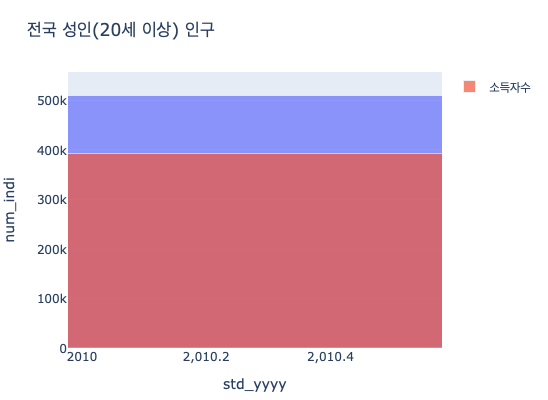

In [166]:
plot_population(mmi['kr_adult20'], 'inc_tot', 'kr_adult20')

In [204]:
df[['std_yyyy', 'mean']].groupby('std_yyyy').max().reset_index()

,std_yyyy,mean
0,2006,7.627377e+07
1,2010,1.028998e+08
2,2014,1.104655e+08
3,2018,1.270409e+08


In [253]:
mmi[
    'seoul_sigungu_adult20'
]['var'].unique()

array(['inc_tot', 'prop_txbs_tot'], dtype=object)

In [254]:
df = mmi['seoul_sigungu_adult20']
df = df.loc[df['var']=='inc_tot', ['std_yyyy', '구', 'mean']]
yearly_max = df[['std_yyyy', 'mean']].groupby('std_yyyy').max().reset_index().rename(columns={'mean': 'gu_max'})
yearly_min = df[['std_yyyy', 'mean']].groupby('std_yyyy').min().reset_index().rename(columns={'mean': 'gu_min'})
yearly_median = df[['std_yyyy', 'mean']].groupby('std_yyyy').median().reset_index().rename(columns={'mean': 'gu_median'})

In [255]:
df = df.merge(yearly_max, on=['std_yyyy']).merge(yearly_min, on=['std_yyyy']).merge(yearly_median, on=['std_yyyy'])

In [236]:
def get_max_min(group):
    return group['gu_max'].max() / group['gu_min'].min()
def get_min_median(group):
    return group['gu_min'].max() / group['gu_median'].min()
def get_max_median(group):
    return group['gu_max'].max() / group['gu_median'].min()

In [264]:
def get_inter_gu_rates(df, var, stat):
    df = mmi['seoul_sigungu_adult20']
    df = df.loc[df['var']==var, ['std_yyyy', '구', stat]]
    yearly_max = df[['std_yyyy', stat]].groupby('std_yyyy').max().reset_index().rename(columns={'mean': 'gu_max'})
    yearly_min = df[['std_yyyy', stat]].groupby('std_yyyy').min().reset_index().rename(columns={'mean': 'gu_min'})
    yearly_median = df[['std_yyyy', stat]].groupby('std_yyyy').median().reset_index().rename(columns={'mean': 'gu_median'})
    df = df.merge(yearly_max, on=['std_yyyy']).merge(yearly_min, on=['std_yyyy']).merge(yearly_median, on=['std_yyyy'])
    return pd.DataFrame({
        'std_yyyy': df[['std_yyyy']].groupby('std_yyyy').first().index.tolist(), 
        '최대구': df[df[stat] == df['gu_max']]['구'].tolist(),
        '중위구': df[df[stat] == df['gu_median']]['구'].tolist(),
        '최소구': df[df[stat] == df['gu_min']]['구'].tolist(), 
        '최대/최소': df.groupby('std_yyyy').apply(get_max_min).tolist(),
        '최소/중위': df.groupby('std_yyyy').apply(get_min_median).tolist(),
        '최대/중위': df.groupby('std_yyyy').apply(get_max_median).tolist(),
    })
    

In [271]:
intergu = dict()
intergu['p'] = get_inter_gu_rates(mmi['seoul_sigungu_adult20'], 'prop_txbs_tot', 'mean')

,std_yyyy,최대구,중위구,최소구,최대/최소,최소/중위,최대/중위
0,2006,강남구,성동구,강북구,5.810593,0.586636,3.408704
1,2007,강남구,성동구,강북구,6.096371,0.574084,3.499827
2,2008,강남구,성동구,금천구,5.954601,0.578586,3.445251
3,2009,강남구,강동구,금천구,5.509378,0.586087,3.228976
4,2010,강남구,성동구,금천구,5.597020,0.577417,3.231814
5,2011,강남구,성동구,금천구,5.684883,0.569340,3.236629
6,2012,강남구,강동구,금천구,5.434973,0.591413,3.214311
7,2013,강남구,성북구,금천구,5.193590,0.600791,3.120262
8,2014,강남구,성북구,금천구,5.223787,0.596995,3.118575
9,2015,강남구,성북구,금천구,5.190260,0.589401,3.059143


In [ ]:
with pd.ExcelWriter(data_dir / 'seoul_inter-gu_ratios.xlsx') as writer:
    for k, df in new.items():
        df.to_excel(writer, index=False, sheet_name=k.lower())

In [15]:
df['var'] = df['var'].apply(translate)

In [16]:
df.head()

,var,std_yyyy,count,num_indi,frac_earners,mean,mean_real,median,median_real,gini,iqsr,rpr
0,근로소득,2006,114798,497009,0.230978,2.510085e+07,3.129703e+07,18000000,2.244333e+07,0.471797,17.247358,0.256912
1,근로소득,2010,138577,510415,0.271499,2.831086e+07,3.109341e+07,19571670,2.149528e+07,0.478636,17.007200,0.238885
2,근로소득,2014,162366,521960,0.311070,3.218922e+07,3.241679e+07,22769634,2.293061e+07,0.468681,16.080858,0.230436
3,근로소득,2018,185600,529639,0.350427,3.609552e+07,3.455770e+07,26353755,2.523098e+07,0.448921,13.870935,0.212672
4,사업소득,2006,49398,497009,0.099391,1.165138e+07,1.452755e+07,4110000,5.124560e+06,0.711305,70.587051,0.320843


In [28]:
df.rename(columns={x: translate(x) for x in df.columns})

,변수,연도,(소득자만),인구,소득자 비율,평균,평균 실질,중위,중위 실질,지니계수,5분위배율,상대빈곤율
0,근로소득,2006,114798,497009,0.230978,2.510085e+07,3.129703e+07,18000000,2.244333e+07,0.471797,17.247358,0.256912
1,근로소득,2010,138577,510415,0.271499,2.831086e+07,3.109341e+07,19571670,2.149528e+07,0.478636,17.007200,0.238885
2,근로소득,2014,162366,521960,0.311070,3.218922e+07,3.241679e+07,22769634,2.293061e+07,0.468681,16.080858,0.230436
3,근로소득,2018,185600,529639,0.350427,3.609552e+07,3.455770e+07,26353755,2.523098e+07,0.448921,13.870935,0.212672
4,사업소득,2006,49398,497009,0.099391,1.165138e+07,1.452755e+07,4110000,5.124560e+06,0.711305,70.587051,0.320843
5,사업소득,2010,66517,510415,0.130319,1.184855e+07,1.301309e+07,3410000,3.745154e+06,0.753374,218.035550,0.344423
6,사업소득,2014,77352,521960,0.148195,1.339644e+07,1.349114e+07,3800000,3.826865e+06,0.756366,278.637061,0.359112
7,사업소득,2018,98941,529639,0.186808,1.410862e+07,1.350754e+07,3940000,3.772140e+06,0.755823,329.550859,0.365976
8,주택과세표준,2006,109180,497009,0.219674,5.700734e+07,7.107969e+07,33000000,4.114611e+07,0.547689,24.084035,0.253013
9,주택과세표준,2010,123378,510415,0.241721,8.763481e+07,9.624804e+07,54600000,5.996639e+07,0.525222,21.850155,0.255443


In [24]:
translate('kr_sido_adult20_earner')

'전국 시도별 성인(20세 이상) 소득자'

In [29]:
k = 'kr_adult20_earner'

In [30]:
df = mmi[k]

In [31]:
df.head()

,var,std_yyyy,count,num_indi,frac_earners,mean,mean_real,median,median_real,gini,iqsr,rpr
0,근로소득,2006,114798,497009,0.230978,2.510085e+07,3.129703e+07,18000000,2.244333e+07,0.471797,17.247358,0.256912
1,근로소득,2010,138577,510415,0.271499,2.831086e+07,3.109341e+07,19571670,2.149528e+07,0.478636,17.007200,0.238885
2,근로소득,2014,162366,521960,0.311070,3.218922e+07,3.241679e+07,22769634,2.293061e+07,0.468681,16.080858,0.230436
3,근로소득,2018,185600,529639,0.350427,3.609552e+07,3.455770e+07,26353755,2.523098e+07,0.448921,13.870935,0.212672
4,사업소득,2006,49398,497009,0.099391,1.165138e+07,1.452755e+07,4110000,5.124560e+06,0.711305,70.587051,0.320843


In [33]:
non_earner_k = '_'.join(k.split('_')[:-1])

In [34]:
non_earner_k

'kr_adult20'

In [37]:
adult20_df = mmi[non_earner_k]
ref = adult20_df.loc[adult20_df['var'] == 'inc_tot', ['std_yyyy', 'count']].rename(columns={'count': 'num_indi'})

In [40]:
df.drop(columns=['num_indi']).merge(ref, on=['std_yyyy'])

,var,std_yyyy,count,frac_earners,mean,mean_real,median,median_real,gini,iqsr,rpr,num_indi
0,근로소득,2006,114798,0.230978,2.510085e+07,3.129703e+07,18000000,2.244333e+07,0.471797,17.247358,0.256912,374702
1,사업소득,2006,49398,0.099391,1.165138e+07,1.452755e+07,4110000,5.124560e+06,0.711305,70.587051,0.320843,374702
2,주택과세표준,2006,109180,0.219674,5.700734e+07,7.107969e+07,33000000,4.114611e+07,0.547689,24.084035,0.253013,374702
3,토지과세표준,2006,68387,0.137597,7.627377e+07,9.510209e+07,22041459,2.748243e+07,0.742366,125.900583,0.330999,374702
4,건물과세표준,2006,21885,0.044033,5.377818e+07,6.705342e+07,17359511,2.164474e+07,0.731122,210.584896,0.356043,374702
5,근로소득,2010,138577,0.271499,2.831086e+07,3.109341e+07,19571670,2.149528e+07,0.478636,17.007200,0.238885,393333
6,사업소득,2010,66517,0.130319,1.184855e+07,1.301309e+07,3410000,3.745154e+06,0.753374,218.035550,0.344423,393333
7,주택과세표준,2010,123378,0.241721,8.763481e+07,9.624804e+07,54600000,5.996639e+07,0.525222,21.850155,0.255443,393333
8,토지과세표준,2010,75010,0.146959,1.028998e+08,1.130134e+08,26465810,2.906702e+07,0.762923,181.745065,0.346620,393333
9,건물과세표준,2010,24236,0.047483,6.091757e+07,6.690489e+07,20787298,2.283039e+07,0.716713,169.934118,0.352946,393333


In [144]:
mmi['seoul_adult20_earner']

,var,std_yyyy,count,num_indi,frac_earners,mean,mean_real,median,median_real,gini,iqsr,rpr,region
0,inc_bus,2006,1198337,8050771,0.148847,1.431802e+07,1.796828e+07,4810000.0,6.036268e+06,0.721152,74.445328,0.308979,서울
1,inc_bus,2007,1394018,8128298,0.171502,1.316519e+07,1.609968e+07,4110000.0,5.026109e+06,0.738071,126.680090,0.330653,서울
2,inc_bus,2008,1577045,8189378,0.192572,1.236125e+07,1.451260e+07,3510000.0,4.120879e+06,0.756614,228.154837,0.354950,서울
3,inc_bus,2009,1599641,8242373,0.194075,1.277522e+07,1.456929e+07,3510000.0,4.002920e+06,0.760943,242.879952,0.354809,서울
4,inc_bus,2010,1606606,8301405,0.193534,1.367786e+07,1.517301e+07,3510000.0,3.893684e+06,0.770142,266.233502,0.353298,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,prop_txbs_lnd,2014,1300948,8420485,0.154498,1.851188e+08,1.874412e+08,34603695.0,3.503781e+07,0.803142,332.714651,0.361800,서울
61,prop_txbs_lnd,2015,1327125,8478004,0.156537,1.900631e+08,1.900631e+08,36172137.0,3.617214e+07,0.800711,326.776931,0.361398,서울
62,prop_txbs_lnd,2016,1354952,8470903,0.159954,1.957587e+08,1.934757e+08,38301830.0,3.785514e+07,0.797544,316.720284,0.360921,서울
63,prop_txbs_lnd,2017,1369333,8444846,0.162150,2.004344e+08,1.942194e+08,39948930.0,3.871020e+07,0.795326,307.143294,0.360152,서울
